<h4 style="margin: 30px;">бизнес-цели и 2 задачи, которые нужно решить:<br/>
Снижение вероятности инсульта у пациентов с высоким риском путем раннего выявления предрасположенности.<br/>
Оптимизация медицинских услуг, предоставляемых пациентам, с учетом их риска инсульта.<br/><br/><br/>
Разработать модель, которая прогнозирует вероятность инсульта у пациента.<br/>
Определить значимые признаки для анализа риска инсульта, чтобы направить усилия медицинских работников на важные факторы.</h4>

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('./csv/option4.csv')

# Обзор данных
print("Количество колонок:", data.columns.size)
print("Колонки:", data.columns)

Количество колонок: 12
Колонки: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [331]:
print("\nНаличие пропущенных значений:")
print(data.isnull().sum())

print("\n\n")

print(data.describe)


Наличие пропущенных значений:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64



<bound method NDFrame.describe of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0            

<p style="margin: 30px;">Возьмем и заменим нулевые значения в столбце bmi на средние значения по столбцу </p>

In [332]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
print("\nНаличие пропущенных значений:")
print(data.isnull().sum())


Наличие пропущенных значений:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<p style="margin: 30px;">Взглянем на выбросы: </p>

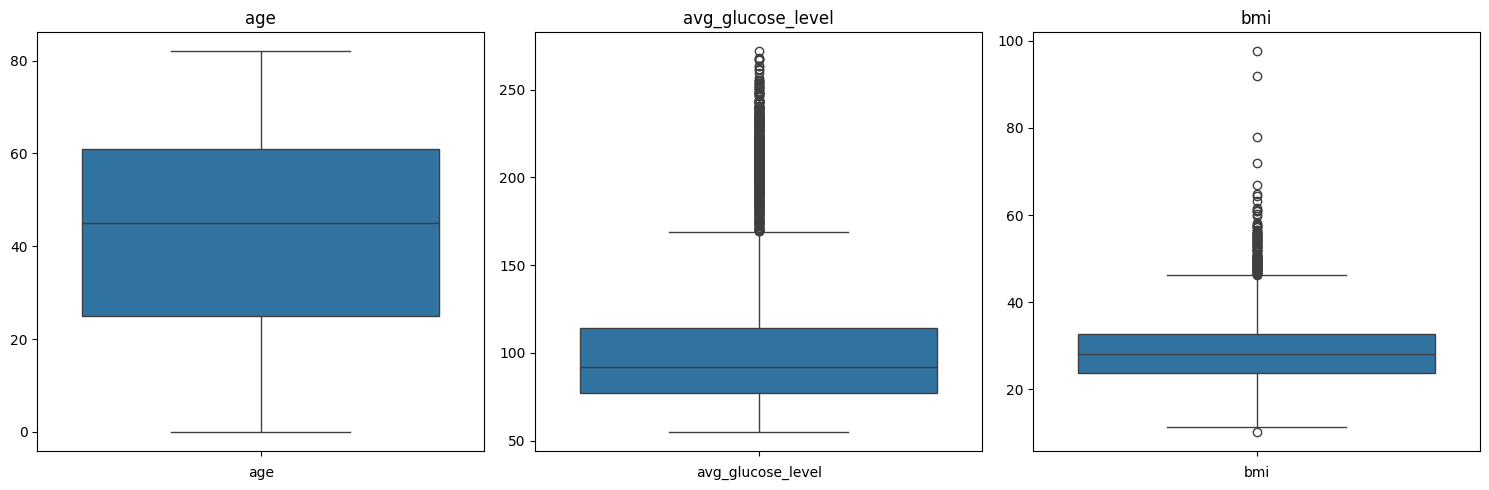

In [333]:
def plot_numeric_boxplots(dataframe):
    # Фильтрация числовых столбцов
    numeric_columns = ['age', 'avg_glucose_level', 'bmi']
    
    # Построение графиков
    if numeric_columns:
        plt.figure(figsize=(15, 5))
        
        for i, col in enumerate(numeric_columns):
            if col != 'id':
                  plt.subplot(1, len(numeric_columns), i + 1)
                  sns.boxplot(y=dataframe[col])
                  plt.title(f'{col}')
                  plt.ylabel('')
                  plt.xlabel(col)
                          
        plt.tight_layout()
        plt.show()
    else:
        print("Нет подходящих числовых столбцов для построения графиков.")

plot_numeric_boxplots(data)

<p style="margin: 30px;">Видим выбросы в столбцах со средним уровнем глюкозы и в столбце bmi (индекс массы тела). устраним выбросы - поставим верхние и нижние границы</p>

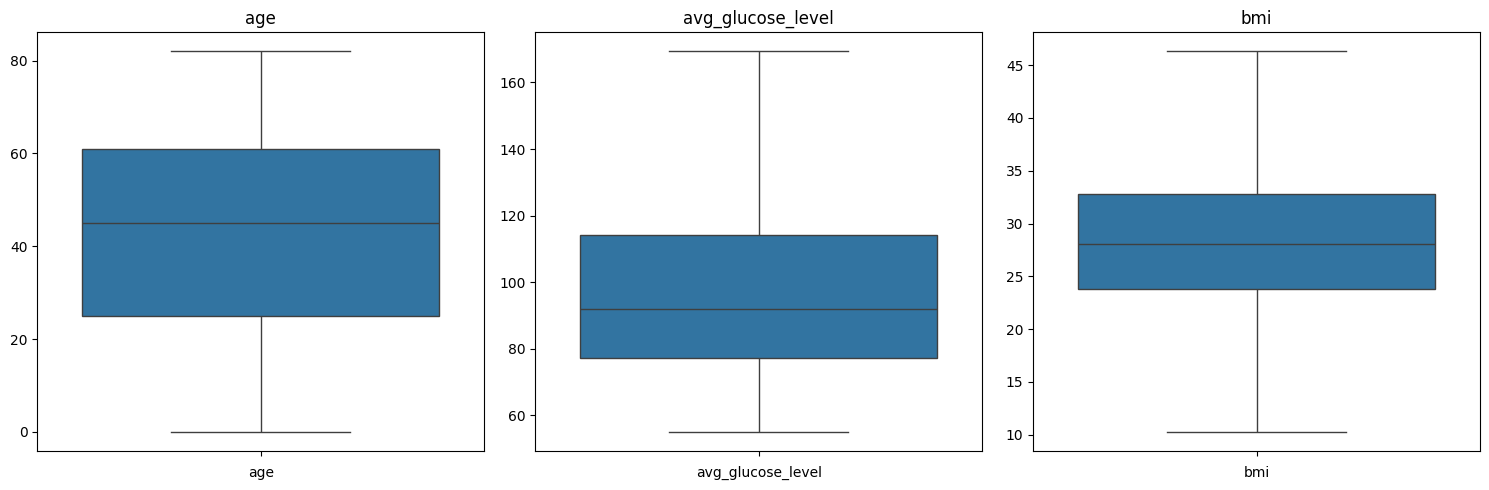

In [334]:
def remove_outliers(df):

    numeric_columns = ['age', 'avg_glucose_level', 'bmi']
    for column in numeric_columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df
    
data = remove_outliers(data)
plot_numeric_boxplots(data)

<p style="margin: 30px;">Теперь можно и к конструированию признаков приступить) данные ведь сбалансированы (в выборках)</p>

<p style="margin: 30px;">Унитарное кодирование категориальных признаков <br/> <br/>Применяем к категориальным (НЕ числовым) признакам: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'</p>

In [335]:
# One-Hot Encoding
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_edit_categories = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print("Данные после унитарного кодирования:")
data_edit_categories.head(10)


Данные после унитарного кодирования:


id   age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   9046  67.0             0              1           169.3575  36.6       1   
1  51676  61.0             0              0           169.3575  28.1       1   
2  31112  80.0             0              1           105.9200  32.5       1   
3  60182  49.0             0              0           169.3575  34.4       1   
4   1665  79.0             1              0           169.3575  24.0       1   
5  56669  81.0             0              0           169.3575  29.0       1   
6  53882  74.0             1              1            70.0900  27.4       1   
7  10434  69.0             0              0            94.3900  22.8       1   
8  27419  59.0             0              0            76.1500  28.1       1   
9  60491  78.0             0              0            58.5700  24.2       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0         True         False              True                   False   
1        False         False              True                   False   
2         True         False              True                   False   
3        False         False              True                   False   
4        False         False              True                   False   
5         True         False              True                   False   
6         True         False              True                   False   
7        False         False             False                   False   
8        False         False              True                   False   
9        False         False              True                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0               True                    False               False   
1              False                     True               False   
2               True                    False               False   
3               True                    False               False   
4              False                     True               False   
5               True                    False               False   
6               True                    False               False   
7               True                    False               False   
8               True                    False               False   
9               True                    False               False   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                  True                            True   
1                 False                           False   
2                 False                           False   
3                  True                           False   
4                 False                           False   
5                  True                            True   
6                 False                           False   
7                  True                           False   
8                 False                           False   
9                  True                           False   

   smoking_status_never smoked  smoking_status_smokes  
0                        False                  False  
1                         True                  False  
2                         True                  False  
3                        False                   True  
4                         True                  False  
5                        False                  False  
6                         True                  False  
7                         True                  False  
8                        False                  False  
9                        False                  False

<p style="margin: 30px;">Дискретизация числовых признаков<br/><br/>Числовые признаки, такие как 'age', 'avg_glucose_level', 'bmi', можно разделить на категории (биннинг).</p>


In [336]:
# data_edit_categories['age_bins'] = pd.cut(data_edit_categories['age'], bins=[0, 18, 30, 50, 100], labels=['ребенок', 'молодой', 'средний', 'пожилой'])
# data_edit_categories['bmi_bins'] = pd.cut(data_edit_categories['bmi'], bins=[0, 18.5, 25, 30, 50], labels=['низкий', 'норма', 'избыток', 'ожирение'])

# print("Данные после дискретизации:")
# data_edit_categories[['age_bins', 'bmi_bins']].head(10)


<p style="margin: 30px;">Ручной синтез новых признаков <br/><br/>
<li>Возрастной индекс глюкозы: age * avg_glucose_level
<li>Индекс массы тела с поправкой на глюкозу: bmi / avg_glucose_level </p>


In [337]:
data_edit_categories['age_glucose_index'] = data_edit_categories['age'] * data_edit_categories['avg_glucose_level']
data_edit_categories['bmi_glucose_ratio'] = data_edit_categories['bmi'] / data_edit_categories['avg_glucose_level']

print("Данные после синтеза новых признаков:")
data_edit_categories[['age_glucose_index', 'bmi_glucose_ratio']].head(10)

Данные после синтеза новых признаков:


age_glucose_index  bmi_glucose_ratio
0         11346.9525           0.216111
1         10330.8075           0.165921
2          8473.6000           0.306835
3          8298.5175           0.203121
4         13379.2425           0.141712
5         13717.9575           0.171235
6          5186.6600           0.390926
7          6512.9100           0.241551
8          4492.8500           0.369009
9          4568.4600           0.413181

<p style="margin: 30px;">Масштабирование признаков<br/><br/>Применяем нормализацию (для сжатия в диапазон [0, 1]) и стандартизацию (для приведения к среднему 0 и стандартному отклонению 1)</p>

In [338]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
standardizer = StandardScaler()

# Нормализация
data_edit_categories[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(data_edit_categories[['age', 'avg_glucose_level', 'bmi']])
print("Данные после нормализации:\n")
data_edit_categories


# # Стандартизация
# X_encoded[['age', 'avg_glucose_level', 'bmi']] = standardizer.fit_transform(X_encoded[['age', 'avg_glucose_level', 'bmi']])
# print("Данные после стандартизации:\n", X_encoded.head(10))



Данные после нормализации:



id       age  hypertension  heart_disease  avg_glucose_level  \
0      9046  0.816895             0              1           1.000000   
1     51676  0.743652             0              0           1.000000   
2     31112  0.975586             0              1           0.444688   
3     60182  0.597168             0              0           1.000000   
4      1665  0.963379             1              0           1.000000   
...     ...       ...           ...            ...                ...   
5105  18234  0.975586             1              0           0.250618   
5106  44873  0.987793             0              0           0.613459   
5107  19723  0.426270             0              0           0.243965   
5108  37544  0.621582             0              0           0.973148   
5109  44679  0.536133             0              0           0.264011   

           bmi  stroke  gender_Male  gender_Other  ever_married_Yes  \
0     0.730556       1         True         False              True   
1     0.494444       1        False         False              True   
2     0.616667       1         True         False              True   
3     0.669444       1        False         False              True   
4     0.380556       1        False         False              True   
...        ...     ...          ...           ...               ...   
5105  0.494444       0        False         False              True   
5106  0.825000       0        False         False              True   
5107  0.563889       0        False         False              True   
5108  0.425000       0         True         False              True   
5109  0.441667       0        False         False              True   

      work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                      False               True                    False   
1                      False              False                     True   
2                      False               True                    False   
3                      False               True                    False   
4                      False              False                     True   
...                      ...                ...                      ...   
5105                   False               True                    False   
5106                   False              False                     True   
5107                   False              False                     True   
5108                   False               True                    False   
5109                   False              False                    False   

      work_type_children  Residence_type_Urban  \
0                  False                  True   
1                  False                 False   
2                  False                 False   
3                  False                  True   
4                  False                 False   
...                  ...                   ...   
5105               False                  True   
5106               False                  True   
5107               False                 False   
5108               False                 False   
5109               False                  True   

      smoking_status_formerly smoked  smoking_status_never smoked  \
0                               True                        False   
1                              False                         True   
2                              False                         True   
3                              False                        False   
4                              False                         True   
...                              ...                          ...   
5105                           False                         True   
5106                           False                         True   
5107                           False                         True   
5108                            True                        False   
5109  

<p style="margin: 30px;">Конструирование признаков с применением фреймворка Featuretools</p>

In [339]:
import featuretools as ft

print("Столбцы в data:", data.columns.tolist())
print(data.isnull().sum())

# Создание EntitySet (основная структура для Featuretools)
entity = ft.EntitySet(id="stroke_prediction")

entity = entity.add_dataframe(
    dataframe_name="data",  
    dataframe=data, 
    index="id",
)

# Генерация новых признаков
feature_matrix, feature_defs = ft.dfs(
    entityset=entity,
    target_dataframe_name="data",  # Основная таблица
    max_depth=2  # Уровень вложенности
)

print("Сгенерированные признаки:")
print(feature_matrix.head())

# Сохранение результатов
feature_matrix.to_csv("./csv/generated_features_copy.csv", index=False)
feature_matrix

Столбцы в data: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


d:\code\mai\labs\AIM-PIbd-31-Bakalskaya-E-D\lab_3\venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
d:\code\mai\labs\AIM-PIbd-31-Bakalskaya-E-D\lab_3\venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
d:\code\mai\labs\AIM-PIbd-31-Bakalskaya-E-D\lab_3\venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
d:\code\mai\labs\AIM-PIbd-31-Bakalskaya-E-D\lab_3\venv\Lib\site-packages\woodwork\

Сгенерированные признаки:
       gender   age  hypertension  heart_disease  ever_married      work_type  \
id                                                                              
9046     Male  67.0             0              1          True        Private   
51676  Female  61.0             0              0          True  Self-employed   
31112    Male  80.0             0              1          True        Private   
60182  Female  49.0             0              0          True        Private   
1665   Female  79.0             1              0          True  Self-employed   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
9046           Urban           169.3575  36.6  formerly smoked       1  
51676          Rural           169.3575  28.1     never smoked       1  
31112          Rural           105.9200  32.5     never smoked       1  
60182          Urban           169.3575  

gender   age  hypertension  heart_disease  ever_married      work_type  \
id                                                                              
9046     Male  67.0             0              1          True        Private   
51676  Female  61.0             0              0          True  Self-employed   
31112    Male  80.0             0              1          True        Private   
60182  Female  49.0             0              0          True        Private   
1665   Female  79.0             1              0          True  Self-employed   
...       ...   ...           ...            ...           ...            ...   
18234  Female  80.0             1              0          True        Private   
44873  Female  81.0             0              0          True  Self-employed   
19723  Female  35.0             0              0          True  Self-employed   
37544    Male  51.0             0              0          True        Private   
44679  Female  44.0             0              0          True       Govt_job   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
9046           Urban           169.3575  36.6  formerly smoked       1  
51676          Rural           169.3575  28.1     never smoked       1  
31112          Rural           105.9200  32.5     never smoked       1  
60182          Urban           169.3575  34.4           smokes       1  
1665           Rural           169.3575  24.0     never smoked       1  
...              ...                ...   ...              ...     ...  
18234          Urban            83.7500  28.1     never smoked       0  
44873          Urban           125.2000  40.0     never smoked       0  
19723          Rural            82.9900  30.6     never smoked       0  
37544          Rural           166.2900  25.6  formerly smoked       0  
44679          Urban            85.2800  26.2          Unknown       0  

[5110 rows x 11 columns]

<p style="margin: 30px;">Так, теперь разобьем на выборки</p>

In [340]:
from sklearn.model_selection import train_test_split

# Определение признаков и целевой переменной

# data_edit_categories = pd.read_csv('./csv/generated_features_copy.csv')


X = data_edit_categories.drop(columns=['id', 'stroke'])  
y = data_edit_categories['stroke']  

# Обучающая выборка
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y)

# Тестовая и контрольная выборки
X_test, X_control, y_test, y_control = train_test_split(X_temp, y_temp, test_size=0.5, random_state=None, stratify=y_temp)

print("\nРазмеры выборок:")
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"Контрольная выборка: {X_control.shape}")

data_edit_categories



Размеры выборок:
Обучающая выборка: (4088, 18)
Тестовая выборка: (511, 18)
Контрольная выборка: (511, 18)


id       age  hypertension  heart_disease  avg_glucose_level  \
0      9046  0.816895             0              1           1.000000   
1     51676  0.743652             0              0           1.000000   
2     31112  0.975586             0              1           0.444688   
3     60182  0.597168             0              0           1.000000   
4      1665  0.963379             1              0           1.000000   
...     ...       ...           ...            ...                ...   
5105  18234  0.975586             1              0           0.250618   
5106  44873  0.987793             0              0           0.613459   
5107  19723  0.426270             0              0           0.243965   
5108  37544  0.621582             0              0           0.973148   
5109  44679  0.536133             0              0           0.264011   

           bmi  stroke  gender_Male  gender_Other  ever_married_Yes  \
0     0.730556       1         True         False              True   
1     0.494444       1        False         False              True   
2     0.616667       1         True         False              True   
3     0.669444       1        False         False              True   
4     0.380556       1        False         False              True   
...        ...     ...          ...           ...               ...   
5105  0.494444       0        False         False              True   
5106  0.825000       0        False         False              True   
5107  0.563889       0        False         False              True   
5108  0.425000       0         True         False              True   
5109  0.441667       0        False         False              True   

      work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                      False               True                    False   
1                      False              False                     True   
2                      False               True                    False   
3                      False               True                    False   
4                      False              False                     True   
...                      ...                ...                      ...   
5105                   False               True                    False   
5106                   False              False                     True   
5107                   False              False                     True   
5108                   False               True                    False   
5109                   False              False                    False   

      work_type_children  Residence_type_Urban  \
0                  False                  True   
1                  False                 False   
2                  False                 False   
3                  False                  True   
4                  False                 False   
...                  ...                   ...   
5105               False                  True   
5106               False                  True   
5107               False                 False   
5108               False                 False   
5109               False                  True   

      smoking_status_formerly smoked  smoking_status_never smoked  \
0                               True                        False   
1                              False                         True   
2                              False                         True   
3                              False                        False   
4                              False                         True   
...                              ...                          ...   
5105                           False                         True   
5106                           False                         True   
5107                           False                         True   
5108                            True                        False   
5109  

stroke
0    4861
1     249
Name: count, dtype: int64


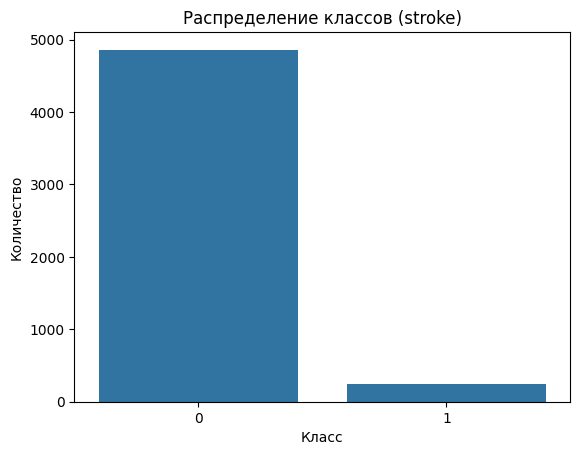

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt

# Подсчет количества объектов каждого класса
class_counts = y.value_counts()
print(class_counts)

# Визуализация
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Распределение классов (stroke)")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()


<p style="margin: 30px;">Напишем функцию и сделаем аугментацию данных</p>

Данные ДО аугментации в ОБУЧАЮЩЕЙ ВЫБОРКЕ  (60-80% данных)

stroke
0    3889
1     199
Name: count, dtype: int64

После оверсемплинга

stroke
0    3889
1     777
Name: count, dtype: int64

После балансировки данных (андерсемплинга)

stroke
0    777
1    777
Name: count, dtype: int64


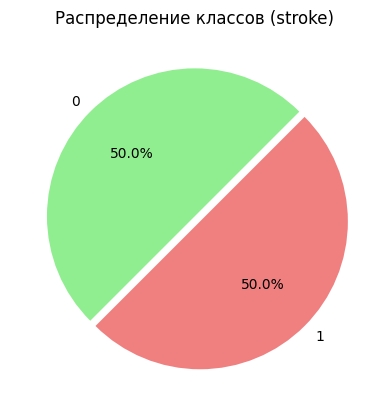

age  hypertension  heart_disease  avg_glucose_level       bmi  \
2508  0.316406             0              0           0.176562  0.341667   
2435  0.768066             0              0           0.351636  0.591667   
2547  0.060059             0              0           0.250618  0.216667   
3885  0.914551             0              0           0.342882  0.691667   
335   0.426270             0              0           0.500974  0.544444   
...        ...           ...            ...                ...       ...   
4661  0.853516             1              0           1.000000  0.977778   
4662  0.926758             0              0           0.024510  0.494444   
4663  0.682617             0              0           1.000000  0.836111   
4664  0.768066             0              0           0.313207  0.494444   
4665  0.902344             0              0           0.156166  0.583333   

      gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
2508        False         False              True                   False   
2435         True         False              True                   False   
2547         True         False             False                   False   
3885         True         False              True                   False   
335         False         False              True                   False   
...           ...           ...               ...                     ...   
4661         True         False              True                   False   
4662        False         False              True                   False   
4663        False         False              True                   False   
4664        False         False              True                   False   
4665         True         False              True                   False   

      work_type_Private  work_type_Self-employed  work_type_children  \
2508               True                    False               False   
2435               True                    False               False   
2547              False                    False                True   
3885              False                    False               False   
335                True                    False               False   
...                 ...                      ...                 ...   
4661               True                    False               False   
4662               True                    False               False   
4663               True                    False               False   
4664               True                    False               False   
4665               True                    False               False   

      Residence_type_Urban  smoking_status_formerly smoked  \
2508                 False                           False   
2435                  True                           False   
2547                  True                           False   
3885                  True                           False   
335                   True                           False   
...                    ...                             ...   
4661                 False                            True   
4662                  True                            True   
4663                  True                            True   
4664                  True                            True   
4665                  True                           False   

      smoking_status_never smoked  smoking_status_smokes  age_glucose_index  \
2508                        False                   True           1957.540   
2435                        False                   True           6003.270   
2547                        False                  False            418.750   
3885                        False                  False           7071.750   
335                         False                  False           3932.250   
...                           ...                    ...                ...   
4661      

In [342]:

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def over_under_sampling(x_selection, y_selection):

    # сначала увеличение меньшинства

    oversampler = RandomOverSampler(sampling_strategy=0.2, random_state=42) 
    x_over, y_over = oversampler.fit_resample(x_selection, y_selection) 

    print("\nПосле оверсемплинга\n")
    print(y_over.value_counts())

    # потом уменьшение большинства

    undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
    x_balanced, y_balanced = undersampler.fit_resample(x_over, y_over)

    print("\nПосле балансировки данных (андерсемплинга)\n")
    print(y_balanced.value_counts())

    plt.pie(
    y_balanced.value_counts(), 
    labels=class_counts.index,  # Метки классов (0 и 1)
    autopct='%1.1f%%',  # Отображение процентов
    colors=['lightgreen', 'lightcoral'],  # Цвета для классов
    startangle=45,  # Поворот диаграммы
    explode=(0, 0.05)  # Небольшое смещение для класса 1
    )
    plt.title("Распределение классов (stroke)")
    plt.show()
    return x_balanced, y_balanced 

print("Данные ДО аугментации в ОБУЧАЮЩЕЙ ВЫБОРКЕ  (60-80% данных)\n")
print(y_train.value_counts())
X_train, y_train = over_under_sampling(X_train, y_train)

X_train

# print("Данные ДО аугментации в ТЕСТОВОЙ ВЫБОРКЕ  (10-20% данных)\n")
# print(y_test.value_counts())
# over_under_sampling(X_test, y_test)

<p style="margin: 30px;">Самое время оценить качество работы модели</p>

Время обучения модели: 0.25 секунд
ROC-AUC: 0.84
F1-Score: 0.29
Матрица ошибок:
[[434  52]
 [ 12  13]]
Отчет по классификации:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       486
           1       0.20      0.52      0.29        25

    accuracy                           0.87       511
   macro avg       0.59      0.71      0.61       511
weighted avg       0.94      0.87      0.90       511



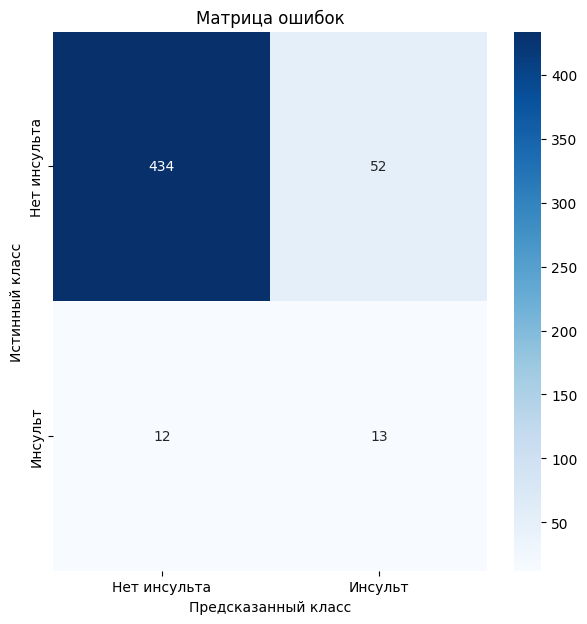

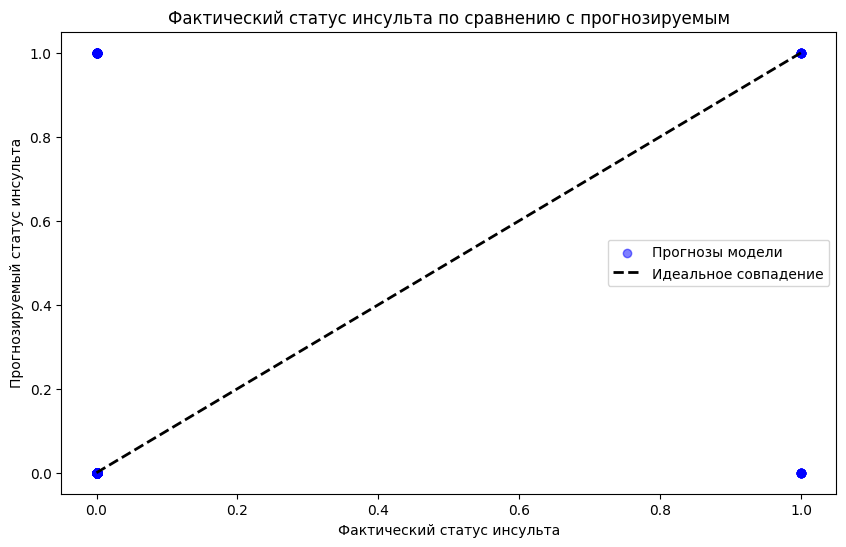

In [343]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report

# Разделение данных на обучающую и тестовую выборки

# X = data.drop(columns=['id', 'stroke'])  # Признаки
# y = data['stroke']  # Целевая переменная

# # Преобразование категориальных признаков с помощью One-Hot Encoding
# categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# # Заполнение пропущенных значений (например, медианой для числовых данных)
# X.fillna(X.median(), inplace=True)

# # Разделение данных на обучающую и тестовую выборки
# # Обучающая выборка
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Тестовая и контрольная выборки
# X_test, X_control, y_test, y_control = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


# Обучение модели
model = RandomForestClassifier(random_state=42)

# Начинаем отсчет времени
start_time = time.time()
model.fit(X_train, y_train)

# Время обучения модели
train_time = time.time() - start_time

# Предсказания и оценка модели
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для ROC-AUC

# Метрики
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Время обучения модели: {train_time:.2f} секунд')
print(f'ROC-AUC: {roc_auc:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Матрица ошибок:')
print(conf_matrix)
print('Отчет по классификации:')
print(class_report)

# Визуализация матрицы ошибок
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Нет инсульта', 'Инсульт'], yticklabels=['Нет инсульта', 'Инсульт'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Прогнозы модели')
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Идеальное совпадение')
plt.xlabel('Фактический статус инсульта')
plt.ylabel('Прогнозируемый статус инсульта')
plt.title('Фактический статус инсульта по сравнению с прогнозируемым')
plt.legend()
plt.show()



<p style="margin: 30px;">А ВОТ ТЕПЕЕЕЕЕЕЕЕЕЕЕРЬ я поправила недоразумения и вроде как модель проперло на выявление инсульта. Но, так как в данных ЛЮТЫЙ дисбаланс, то модель слаба на выявление инсульта все еще.</p>